# Analysis of Passenger Cars

In [1]:
import pandas as pd 
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Task 1

data = pd.read_csv('DS1_C4_S7_Car_Data_Challenge.csv')

df = pd.DataFrame(data)
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1271,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [3]:
# Columns to keep

cols_to_keep = ['Make', 'Cylinders', 'Kerb_Weight', 'Displacement', 'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque']



In [4]:
car_df = df.loc[:, cols_to_keep]
car_df

,Make,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
0,Tata,2.0,660 kg,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
1,Tata,2.0,725 kg,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
2,Tata,2.0,710 kg,624.0,15.0,NaN,NaN,38PS@5500rpm,51Nm@4000rpm
3,Tata,2.0,725 kg,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
4,Tata,2.0,725 kg,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,4.0,1170 kg,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1271,Honda,4.0,1175 kg,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1272,Honda,4.0,1107 kg,1497.0,40.0,18.00,18.00,119PS@6600rpm,145Nm@4600rpm
1273,Honda,4.0,1080 kg,1497.0,40.0,14.30,16.40,119PS@6600rpm,145Nm@4600rpm


In [5]:
car_df.isnull().sum()

Make                         75
Cylinders                    66
Kerb_Weight                 365
Displacement                 12
Fuel_Tank_Capacity_litre     69
City_Mileage_km_litre       555
Highway_Mileage_km_litre    799
Power                         0
Torque                        2
dtype: int64

In [6]:
# Dropping missing values

car_df.dropna(inplace = True)
car_df

,Make,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,Maruti Suzuki,4.0,920 kg,1196.0,40.0,12.00,15.00,73PS@6000rpm,101Nm@3000rpm
25,Maruti Suzuki,4.0,940 kg,1196.0,40.0,12.00,15.00,74PS@6000RPM,101Nm@3000rpm
26,Maruti Suzuki,4.0,928 kg,1196.0,40.0,11.00,15.00,73PS@6000rpm,101Nm@3000rpm
29,Maruti Suzuki,3.0,745 kg,998.0,35.0,14.00,17.00,68PS@6000rpm,90Nm@3500rpm
30,Maruti Suzuki,3.0,750 kg,998.0,35.0,14.00,17.00,68PS@6200rpm,90Nm@3500rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,4.0,1170 kg,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1271,Honda,4.0,1175 kg,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1272,Honda,4.0,1107 kg,1497.0,40.0,18.00,18.00,119PS@6600rpm,145Nm@4600rpm
1273,Honda,4.0,1080 kg,1497.0,40.0,14.30,16.40,119PS@6600rpm,145Nm@4600rpm


In [7]:
car_df.isnull().sum()

Make                        0
Cylinders                   0
Kerb_Weight                 0
Displacement                0
Fuel_Tank_Capacity_litre    0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Power                       0
Torque                      0
dtype: int64

In [8]:
# Task 2

# Code for data cleaning 

car_df['Kerb_Weight'] = car_df['Kerb_Weight'].str.replace(r"kg",'') # replacing all occurances of kg with "" (nothing) i.e removing "kg"
car_df


,Make,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,Maruti Suzuki,4.0,920,1196.0,40.0,12.00,15.00,73PS@6000rpm,101Nm@3000rpm
25,Maruti Suzuki,4.0,940,1196.0,40.0,12.00,15.00,74PS@6000RPM,101Nm@3000rpm
26,Maruti Suzuki,4.0,928,1196.0,40.0,11.00,15.00,73PS@6000rpm,101Nm@3000rpm
29,Maruti Suzuki,3.0,745,998.0,35.0,14.00,17.00,68PS@6000rpm,90Nm@3500rpm
30,Maruti Suzuki,3.0,750,998.0,35.0,14.00,17.00,68PS@6200rpm,90Nm@3500rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,4.0,1170,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1271,Honda,4.0,1175,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1272,Honda,4.0,1107,1497.0,40.0,18.00,18.00,119PS@6600rpm,145Nm@4600rpm
1273,Honda,4.0,1080,1497.0,40.0,14.30,16.40,119PS@6600rpm,145Nm@4600rpm


In [9]:
# Code for cleaning the power column 
print("Before cleaning")
car_df.head()


Before cleaning


,Make,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,Maruti Suzuki,4.0,920,1196.0,40.0,12.0,15.0,73PS@6000rpm,101Nm@3000rpm
25,Maruti Suzuki,4.0,940,1196.0,40.0,12.0,15.0,74PS@6000RPM,101Nm@3000rpm
26,Maruti Suzuki,4.0,928,1196.0,40.0,11.0,15.0,73PS@6000rpm,101Nm@3000rpm
29,Maruti Suzuki,3.0,745,998.0,35.0,14.0,17.0,68PS@6000rpm,90Nm@3500rpm
30,Maruti Suzuki,3.0,750,998.0,35.0,14.0,17.0,68PS@6200rpm,90Nm@3500rpm


In [10]:
# Regular expression used for cleaning the Power column 
car_df["Power"] = car_df["Power"].str.strip () # stripping white spaces if any 
car_df['Power'] = car_df['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 
car_df

,Make,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,Maruti Suzuki,4.0,920,1196.0,40.0,12.00,15.00,73,101Nm@3000rpm
25,Maruti Suzuki,4.0,940,1196.0,40.0,12.00,15.00,74,101Nm@3000rpm
26,Maruti Suzuki,4.0,928,1196.0,40.0,11.00,15.00,73,101Nm@3000rpm
29,Maruti Suzuki,3.0,745,998.0,35.0,14.00,17.00,68,90Nm@3500rpm
30,Maruti Suzuki,3.0,750,998.0,35.0,14.00,17.00,68,90Nm@3500rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,4.0,1170,1498.0,40.0,22.60,25.10,100,200Nm@1750rpm
1271,Honda,4.0,1175,1498.0,40.0,22.60,25.10,100,200Nm@1750rpm
1272,Honda,4.0,1107,1497.0,40.0,18.00,18.00,119,145Nm@4600rpm
1273,Honda,4.0,1080,1497.0,40.0,14.30,16.40,119,145Nm@4600rpm


In [11]:
# Regular expression used for cleaning the Power column 
car_df["Torque"] = car_df["Torque"].str.strip() # stripping white spaces if any 
car_df['Torque'] = car_df['Torque'].str.replace(r"-",'', regex=True) # Removing any occurances of "-" in this the column
car_df['Torque'] = car_df['Torque'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 
car_df

,Make,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,Maruti Suzuki,4.0,920,1196.0,40.0,12.00,15.00,73,101
25,Maruti Suzuki,4.0,940,1196.0,40.0,12.00,15.00,74,101
26,Maruti Suzuki,4.0,928,1196.0,40.0,11.00,15.00,73,101
29,Maruti Suzuki,3.0,745,998.0,35.0,14.00,17.00,68,90
30,Maruti Suzuki,3.0,750,998.0,35.0,14.00,17.00,68,90
...,...,...,...,...,...,...,...,...,...
1270,Honda,4.0,1170,1498.0,40.0,22.60,25.10,100,200
1271,Honda,4.0,1175,1498.0,40.0,22.60,25.10,100,200
1272,Honda,4.0,1107,1497.0,40.0,18.00,18.00,119,145
1273,Honda,4.0,1080,1497.0,40.0,14.30,16.40,119,145


In [12]:
# Task 3

df1 = car_df.iloc[:,1:9]
df1

,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,4.0,920,1196.0,40.0,12.00,15.00,73,101
25,4.0,940,1196.0,40.0,12.00,15.00,74,101
26,4.0,928,1196.0,40.0,11.00,15.00,73,101
29,3.0,745,998.0,35.0,14.00,17.00,68,90
30,3.0,750,998.0,35.0,14.00,17.00,68,90
...,...,...,...,...,...,...,...,...
1270,4.0,1170,1498.0,40.0,22.60,25.10,100,200
1271,4.0,1175,1498.0,40.0,22.60,25.10,100,200
1272,4.0,1107,1497.0,40.0,18.00,18.00,119,145
1273,4.0,1080,1497.0,40.0,14.30,16.40,119,145


In [13]:
df1.dtypes

Cylinders                   float64
Kerb_Weight                  object
Displacement                float64
Fuel_Tank_Capacity_litre    float64
City_Mileage_km_litre       float64
Highway_Mileage_km_litre    float64
Power                        object
Torque                       object
dtype: object

In [14]:
# Converting all columns of float data type to int data type

df1 = df1.astype({'Cylinders':'float64', 'Kerb_Weight':'float64','Displacement':'float64','Fuel_Tank_Capacity_litre':'float64',
                  'City_Mileage_km_litre':'float64','Highway_Mileage_km_litre':'float64','Power':'float64','Torque':'float64'})
df1.dtypes

Cylinders                   float64
Kerb_Weight                 float64
Displacement                float64
Fuel_Tank_Capacity_litre    float64
City_Mileage_km_litre       float64
Highway_Mileage_km_litre    float64
Power                       float64
Torque                      float64
dtype: object

In [15]:
# Declaring three list to store calculted mean, median, standard deviation, co-efficient of variation
Mean = []
Median = []
SD = []
CV = []

#Iterating each column of DataFrame 
for col in df1:
    col_mean = df1.loc[:, col].mean()
    Mean.append(col_mean)
    Median.append(df1.loc[:, col].median())
    col_sd = df1.loc[:, col].std()
    SD.append(col_sd)
    CV.append(col_sd/col_mean*100)

row_head = ['Mean', 'Median', 'Standard Deviation', 'Co-efficient of Variation']
col_head = ['Cylinders','Kerb_Weight','Displacement','Fuel_Tank_Capacity','City_Mileage','Highway_Mileage','Power','Torque']

# create a new data frame 
d_data = pd.DataFrame([Mean, Median, SD, CV], columns = col_head)

# Inserting a new column 'Measures' at the beginning of the data frame with 3 measures
d_data.insert(0, "Measures", row_head, True)

d_data

,Measures,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity,City_Mileage,Highway_Mileage,Power,Torque
0,Mean,4.382911,1365.240506,1878.427215,53.393987,14.354462,17.133639,152.697785,258.208228
1,Median,4.000000,1210.000000,1497.000000,48.000000,14.000000,17.710000,100.000000,200.000000
2,Standard Deviation,1.604228,455.204554,1080.745717,15.725846,5.366518,4.921881,139.867859,178.567225
3,Co-efficient of Variation,36.601887,33.342444,57.534607,29.452465,37.385716,28.726420,91.597831,69.156288


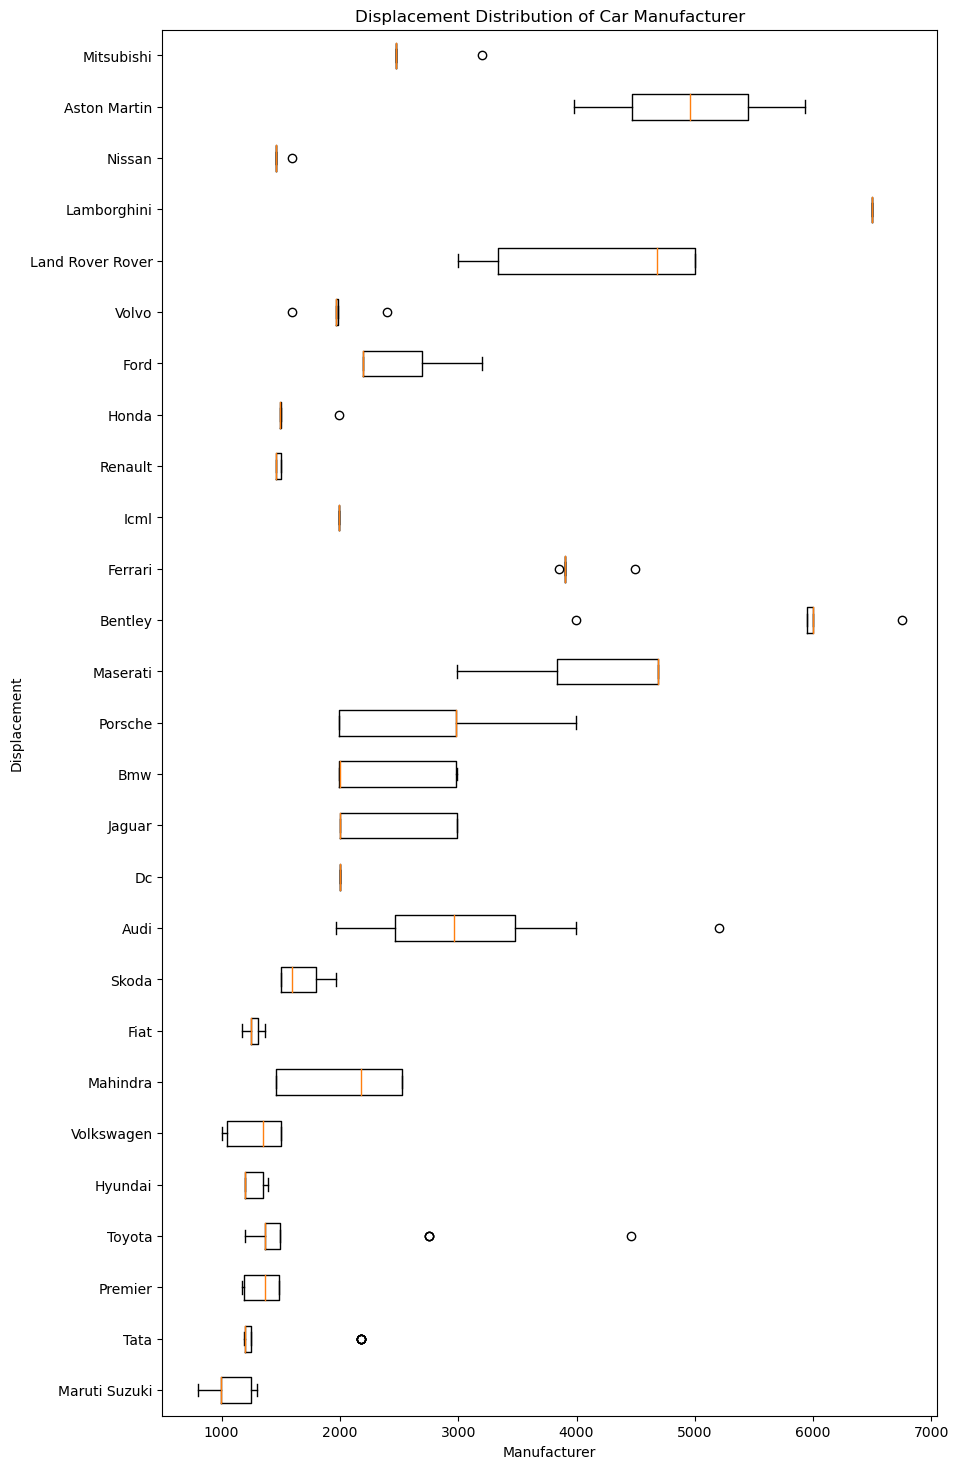

In [16]:
# Creating a list of unique manufacturers in the data
manufacturers = car_df['Make'].unique()

# Creating a box plot for each manufacturer's displacement distribution
plt.figure(figsize=(10, 18))
plt.title('Displacement Distribution of Car Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.boxplot([car_df[car_df['Make'] == m]['Displacement'] for m in manufacturers], labels=manufacturers, vert = 0)
plt.show()


In [17]:
# Task 4

# Selecting the car manufacturers - Renault, Toyota, Honda

cars = car_df[(car_df['Make'] == 'Renault') | (car_df['Make'] == 'Toyota') | (car_df['Make'] == 'Honda')]
cars

,Make,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
87,Toyota,4.0,895,1197.0,45.0,15.1,17.71,80,104
88,Toyota,4.0,895,1197.0,45.0,15.1,18.16,80,104
89,Toyota,4.0,895,1364.0,45.0,20.3,23.59,68,170
90,Toyota,4.0,895,1197.0,45.0,15.1,17.71,80,104
91,Toyota,4.0,895,1364.0,45.0,20.3,23.08,68,170
...,...,...,...,...,...,...,...,...,...
1269,Honda,4.0,1148,1498.0,40.0,22.6,25.60,100,200
1270,Honda,4.0,1170,1498.0,40.0,22.6,25.10,100,200
1271,Honda,4.0,1175,1498.0,40.0,22.6,25.10,100,200
1272,Honda,4.0,1107,1497.0,40.0,18.0,18.00,119,145


In [18]:
cars.dtypes

Make                         object
Cylinders                   float64
Kerb_Weight                  object
Displacement                float64
Fuel_Tank_Capacity_litre    float64
City_Mileage_km_litre       float64
Highway_Mileage_km_litre    float64
Power                        object
Torque                       object
dtype: object

In [19]:
cars = cars.astype({'Kerb_Weight':'float64', 'Power':'float64','Torque':'float64'})
cars.dtypes

Make                         object
Cylinders                   float64
Kerb_Weight                 float64
Displacement                float64
Fuel_Tank_Capacity_litre    float64
City_Mileage_km_litre       float64
Highway_Mileage_km_litre    float64
Power                       float64
Torque                      float64
dtype: object

### City Mileage Vs Cylinder

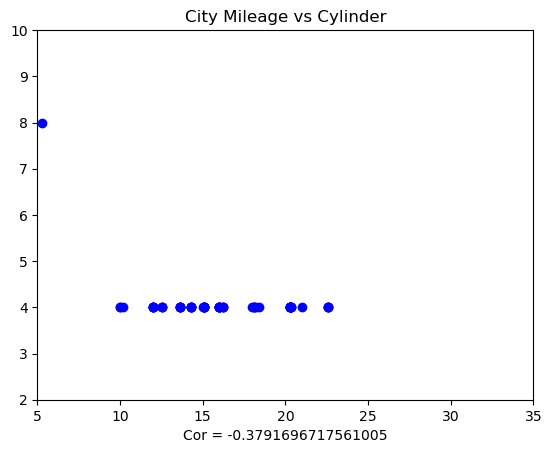

In [20]:
#Calculating Correlation Coefficient
mc_corr = cars['City_Mileage_km_litre'].corr(cars['Cylinders'])

#Showing relation among variables using Scatter plot
plt.scatter(cars['City_Mileage_km_litre'], cars['Cylinders'], color = 'blue')
plt.title('City Mileage vs Cylinder')
plt.xlim(5, 35)
plt.ylim(2, 10.0)
plt.xlabel('Cor = '+ str(mc_corr))
plt.show();

#### Number of cylinders is negatively corelated to Mileage. More the number of cylinders, lesser is the mileage

### Highway Mileage Vs Power

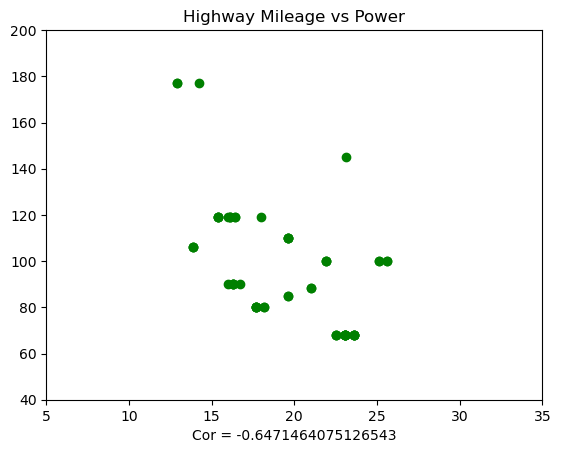

In [21]:
#Calculating Correlation Coefficient
mc_corr1 = cars['Highway_Mileage_km_litre'].corr(cars['Power'])

#Showing relation among variables using Scatter plot
plt.scatter(cars['Highway_Mileage_km_litre'], cars['Power'], color = 'green')
plt.title('Highway Mileage vs Power')
plt.xlim(5, 35)
plt.ylim(40, 200)
plt.xlabel('Cor = '+ str(mc_corr1))
plt.show();

#### Power is negatively corelated to Mileage. More the Power, lesser is the mileage

### City Mileage Vs Kerb Weight

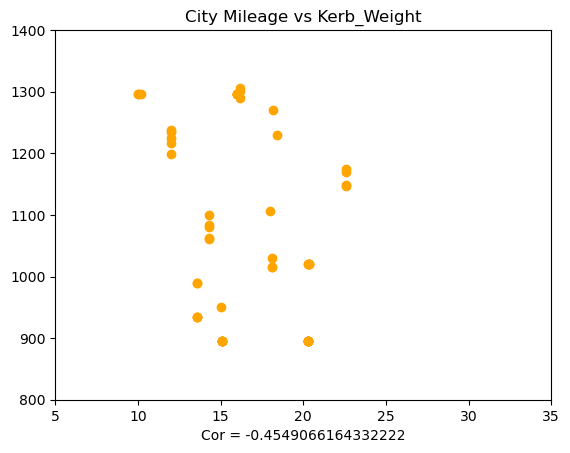

In [22]:
#Calculating Correlation Coefficient
mc_corr2 = cars['City_Mileage_km_litre'].corr(cars['Kerb_Weight'])

#Showing relation among variables using Scatter plot
plt.scatter(cars['City_Mileage_km_litre'], cars['Kerb_Weight'], color = 'orange')
plt.title('City Mileage vs Kerb_Weight')
plt.xlim(5, 35)
plt.ylim(800, 1400)
plt.xlabel('Cor = '+ str(mc_corr2))
plt.show();

#### Kerb Weight is negatively corelated to Mileage. More the weight of the car, lesser is the mileage